In [1]:
import os
import api

# 预处理

### json读取

<table style="float:left">
    <tr>
        <th align="left">参数名</th> 
        <th align="left">参数值</th> 
        <th align="left">参数说明</th>
    </tr>
    <tr>
      <td align="left"  rowspan="2"><b>mini</b></td>
      <td align="left">False</td> 
      <td align="left">a. NG/OK数量分布 </br>b. 缺陷类别数量分布</td> 
    </tr>
    <tr>
      <td align="left">True</td> 
      <td align="left">a. NG/OK数量分布 </br>b. 缺陷类别数量分布 </br>c. 缺陷宽高大小分布 </br>d. 缺陷面积分布占比图</td> 
    </tr>
</table>

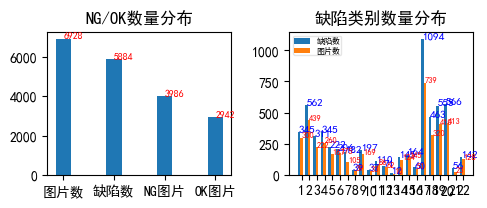

In [7]:
jf = r"D:\pad_before\train\images\data_merge.json"
api.read_json_api(jf,mini = True)

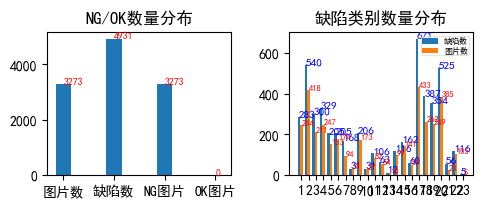

In [25]:
jf = r"D:\pad_before\train\images\NG\reclassify.json"
api.read_json_api(jf,mini = True)

## 现场采集标注重命名

### 按类别采集

<p style="color:#409EFF;font-weight:bold">现场按工艺类别采集，每个文件夹以工艺命名<br />类别名必须改成英文(e.g.开裂 -> KL),一个文件夹只有一个标注</p>

In [17]:
img_path = r"\\Ds418\NAS4\JT-A壳\ann_data\m"
dst = img_path
api.rename_classify_folder_api(img_path, dst, start="LAPTOPA_JT_0612_SLAVE_NG_")#PAD_1F_0421_NG_

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.61it/s]

 [INFO]--> 2023-06-17 10:32:26:success save json: \\Ds418\NAS4\JT-A壳\ann_data\m\rename_classify.json 


### 单文件夹采集

<p style="color:#409EFF;font-weight:bold">最常用的采集方式,只有1个文件夹,里面有n张图片和1个json</p>

In [9]:
jf = r"D:\pad_before\ce1000\1\NG\reclassify.json"
img_path = os.path.dirname(jf)
dst = os.path.dirname(jf)
api.rename_one_folder_api(img_path, jf, dst,start="PAD_2B_0609_PICK_NG_")

100%|████████████████████████████████████████████████████████████████████████████████| 754/754 [00:17<00:00, 42.77it/s]


 [INFO]--> 2023-06-10 16:59:01:success save json: D:\pad_before\ce1000\1\NG\rename_one_folder.json 


### OK图重命名

<p style="color:#409EFF;font-weight:bold">常用于负样本生成</p>

In [8]:
img_path = r"D:\pad_before\ce1000\1"
dst = img_path
api.rename_img_json_api(img_path,dst, start="PAD_2B_0609_PICK_OK_")#

100%|██████████████████████████████████████████████████████████████████████████████| 774/774 [00:00<00:00, 2075.06it/s]


 [INFO]--> 2023-06-10 16:58:16:success save json: D:\pad_before\ce1000\1\ok-pcs.json 


## JSON操作

### json合并

In [2]:
jf_path = r"C:\Users\lubin\Desktop\images\0522"
api.merge_json_api(jf_path)

 [INFO]--> 2023-06-17 11:28:29:success save json: C:\Users\lubin\Desktop\images\0522\data_merge_06171128112828.json 


### 绘制标注

<div>
<div style="float:left">
  <table border="2" cellspacing="10">
    <tr>
        <th align="left">参数名</th> 
        <th align="left">参数值</th> 
        <th align="left">参数说明</th> 
    </tr>
    <tr>
    <td align="left" rowspan="2"><b>shape</b></td>
      <td align="center">POLYGON</td>
      <td align="left">多边形</td> 
    </tr>
    <tr>
      <td align="center">RECT</td>
      <td align="left">矩形</td> 
    </tr>
    <tr>
      <td align="left" rowspan="2"><b>color</b></td>
      <td align="center">False</td>
      <td align="left">默认标注json绿色，推理json红色</td> 
    </tr>
    <tr>
      <td align="center">(255,0,0)</td>
      <td align="left">颜色信息</td> 
    </tr>
    <tr>
      <td align="left" rowspan="2"><b>classid</b></td>
      <td align="center">False</td>
      <td align="left">默认全标签</td> 
    </tr>
    <tr>
      <td align="center">[1,2]</td>
      <td align="left">绘制id列表</td> 
    </tr>
  </table>
</div>

<div style="margin-left:10px"> 
  <table border="2" cellspacing="10" >
    <tr>
        <th align="left">参数名</th> 
        <th align="left">参数值</th> 
        <th align="left">参数说明</th> 
    </tr>
    <tr>
      <td align="left" ><b>label</b></td>
      <td align="center">False/True</td>
      <td align="left">标签</td> 
    </tr>
    <tr>
      <td align="left"><b>score</b></td>
      <td align="center">False/True</td> 
      <td align="left">得分</td> 
    </tr>
    <tr>
      <td align="left"><b>area</b></td>
      <td align="center">False/True</td> 
      <td align="left">面积</td> 
    </tr>
    <tr>
      <td align="left"><b>font_size</b></td>
      <td align="center">INT</td> 
      <td align="left">字体大小</td> 
    </tr>  
  </table>
</div>
</div>

In [5]:
import api
jf = r"C:\Users\lubin\Desktop\images\0522\Jmodel_0459999.json.json"
inf_jf = r"C:\Users\lubin\Desktop\images\0522\Jmodel_0461999.json.json"
img_path = r"C:\Users\lubin\Desktop\images\0522"
dst = img_path+"_rect"
draw_cfg_list = [{"shape":"RECT","label":True,"score":False,"area":False,"color":(0,255,0),"font_size":1,"classid":False},
                 {"shape":"POLYGON","label":True,"score":False,"area":False,"color":(0,0,255),"font_size":1,"classid":False}]
api.draw_mask_api(img_path, jfs=[jf,inf_jf], draw_cfg_list=draw_cfg_list,dst=dst, spotcheck=False)

0it [00:00, ?it/s]


### 根据图片过滤json

In [10]:
jf = r"D:\pad_before\train\images\NG_classify1\crop_img.json"
img_path = r"D:\pad_before\train\images\NG_classify1\train\0"
dst = img_path
api.filter_json_by_img_api(img_path,jf,dst)

 [INFO]--> 2023-06-16 13:35:12:success save json: D:\pad_before\train\images\NG_classify1\train\0\filter_json.json 


### 按类别裁切小图

<p style="color:#409EFF;font-weight:bold">根据 json标签生成以标签命名的文件夹，每个文件夹保存相应类别小图</p>
<div style="float:left">
    <table>
    <tr>
        <th>参数</th>
    <tr/>
    <tr>
        <td align="left"><b>scale</b></td> 
        <td align="center">False</td>
        <td align="left" rowspan="2">GT_BOX偏移offset裁剪<br>输出大小与缺陷本身大小接近,长宽比偏大时不清晰</td>
    </tr>
    <tr>
        <td align="left"><b>offset</b></td>
        <td align="center">50</td> 
    </tr>
    </table>
</div>
<div style="margin-left:20px">
    <table>
    <tr>
        <th>参数</th>
    <tr/>
    <tr>
        <td align="left"><b>scale</b></td> 
        <td align="center">True</td>
        <td align="left" rowspan="2">以crop_size的倍数裁剪缺陷<br>输出缺陷总体比列接近,含有的背景更多</td>
    </tr>
    <tr>
        <td align="left"><b>crop_size</b></td>
        <td align="center">120</td> 
    </tr>
    </table>
</div>

In [2]:
jf = r"D:\pad_before\train\images\data_merge.json"
img_path = os.path.dirname(jf)
dst = img_path+"_classify"
api.crop_small_img_api(img_path, jf, dst, scale=True,offset=50,crop_size=256)

 63%|█████████████████████████████████████████████████▍                            | 4386/6928 [08:31<05:00,  8.45it/s]

D:\pad_before\train\images PAD_2B_0511_inner_LJ_NG_14-4_1_3.jpg


 63%|█████████████████████████████████████████████████▍                            | 4388/6928 [08:31<05:56,  7.13it/s]

D:\pad_before\train\images PAD_2B_0511_inner_LJ_NG_62-4_1_9.jpg


 63%|█████████████████████████████████████████████████▍                            | 4395/6928 [08:32<06:18,  6.69it/s]

D:\pad_before\train\images PAD_2B_0512_inner_LJ_NG_8-4_1_8.jpg


 64%|█████████████████████████████████████████████████▌                            | 4400/6928 [08:33<07:31,  5.59it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_13-4_1_10.jpg


 64%|█████████████████████████████████████████████████▌                            | 4401/6928 [08:33<09:42,  4.34it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_22-4_1_3.jpg


 64%|█████████████████████████████████████████████████▌                            | 4402/6928 [08:34<10:30,  4.00it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_34-4_1_2.jpg


 64%|█████████████████████████████████████████████████▌                            | 4404/6928 [08:34<08:45,  4.80it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_36-4_1_6.jpg


 64%|█████████████████████████████████████████████████▌                            | 4405/6928 [08:34<09:17,  4.52it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_41-4_1_10.jpg


 64%|█████████████████████████████████████████████████▌                            | 4407/6928 [08:35<08:42,  4.82it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_45-4_1_6.jpg


 64%|█████████████████████████████████████████████████▋                            | 4408/6928 [08:35<10:26,  4.02it/s]

D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_54-4_1_7.jpg
D:\pad_before\train\images PAD_2B_0513_inner_LJ_NG_9-4_1_2.jpg


 64%|█████████████████████████████████████████████████▉                            | 4431/6928 [08:37<06:35,  6.31it/s]

D:\pad_before\train\images PAD_2B_0515_inner_LJ_NG_10-4_1_3.jpg


 89%|█████████████████████████████████████████████████████████████████████▋        | 6188/6928 [11:27<00:38, 19.21it/s]

D:\pad_before\train\images PAD_2B_0525_inner_PICK_OK_inner_399-4_1_2_s0.jpg


 90%|██████████████████████████████████████████████████████████████████████▌       | 6268/6928 [11:32<00:55, 11.91it/s]

D:\pad_before\train\images PAD_2B_0525_outer_PICK_NG_outer_260-3_2_10.jpg


100%|██████████████████████████████████████████████████████████████████████████████| 6928/6928 [13:13<00:00,  8.73it/s]


### 按类别小图生成JSON

<p style="color:#409EFF;font-weight:bold">手动调整各个类别文件夹中小图后,生成分类后的json</p>
<p style="color:red;font-weight:bold">可手动创建 <i>mark</i>,<i>del</i> 两个文件夹用于挑选需要重新标注和需要删除的原图</p>

In [24]:
img_path = r"D:\pad_before\train\images_classify"
jf = r"D:\pad_before\train\images\NG\ng.json"
dst = os.path.dirname(jf)
api.classify_json_api(img_path,jf,dst)

100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 366.06it/s]


 [INFO]--> 2023-06-06 16:45:38:success save json: D:\pad_before\train\images\NG\reclassify.json 


## 切分数据集

### 随机拆分

<table border="2" cellspacing="30" style="float:left">
    <tr>
      <td align="left"><b>repeat</b></td>
      <td align="center">单图多缺陷降维</td>
    </tr>
    <tr>
      <td align="left"><b>ratio</b></td>
      <td align="center">测试集/总数据集比值</td>
    </tr>
</table>

In [ ]:
jf = r"D:\PAD\images\images\data_merge.json"
img_path = os.path.dirname(jf)
repeat = 2
ratio = 1/4  #（训练集3/测试1）
api.dataset_partition_api(img_path,jf,repeat,ratio,seed=88)

### 工位-形态拆分

1. 图片按工位切分(无点位信息图片自动移至error文件夹，手动调整文件分布)

In [ ]:
img_path = r"D:\PAD\images"
api.split_img_by_station_api(img_path)

2. 按点位分布拆分json,并按每个文件夹拆分类别小图，手动调整类别信息

In [ ]:
jf = r"D:\PAD\images\data_merge.json"
img_path = os.path.dirname(jf)
api.label_partition_by_station_api(img_path,jf, scale=True,offset=50,crop_size=120)

3. 按每个点位每种形态重新生成json,拆分数据集

In [ ]:
folder_path = r"D:\PAD\images"
api.dataset_partition_by_station_api(folder_path,repeat=2,ratio=1/4,seed=88)

## json格式转换

### json => via

In [5]:
jf = r"D:\pad_before\zhu2000\pick\filter_json.json"
img_path = os.path.dirname(jf)
api.json_to_via_api(img_path, jf)

 [INFO]--> 2023-06-10 15:34:17:success save json: D:\pad_before\zhu2000\pick\json_to_via.json 


### via => json

<p style="color:#409EFF;font-weight:bold">VIA标注软件格式去除后缀</p>

In [6]:
jf = r"C:\Users\lubin\Desktop\images\via_export_json (7).json"
api.via_to_json_api(jf)

 [INFO]--> 2023-06-15 19:56:44:success save json: C:\Users\lubin\Desktop\images\via_to_json.json 


## 图像处理

### 分割

<p style="color:#409EFF;font-weight:bold">相关参数路径：dpp/dataset/transforms/config.yaml</p>
<div style="float:left">
    <table border="2" cellspacing="0">
        <tr>
          <th align="left">分割方式</th>
          <th align="left"></th>
          <th align="left">config.yaml参数说明</th>
        </tr>
        <tr>
          <td align="left" rowspan="2">AvgSeg</td>
          <td align="center" rowspan="2">等比分割</td>
          <td align="left">crop_size：均分大小</td> 
        </tr>
        <tr>
          <td align="left">extra：FILL(填充), DROP(丢弃),KEEP(保留)</td> 
        </tr>
        <tr>
          <td align="left">JsonSeg</td>
          <td align="center">软件配置文件分割</td>
          <td align="left">jfs：软件每个工位配置文件json</td>
        </tr>
        <tr>
          <td align="left">CeSeg</td>
          <td align="center">3工位侧面相机分割</td>
          <td align="left">start,end：自定义起始分割位置</td>
        </tr>
        <tr>
          <td align="left">Cv2Seg</td>
          <td align="center">边缘提取</td>
          <td align="left">二值化，卷积等参数</td>
        </tr>
        <tr>
          <td align="left">ThreeSeg</td>
          <td align="center">后盖3工位3000*4096分割</td>
          <td align="left">参数固定</td>
        </tr>
    </table>
</div>

In [9]:
import api,os
jf = r"D:\pad_before\train\label9\data.json"
src = os.path.dirname(jf)
# jf = None
dst = src+"_segment"
api.img_segment_api("AvgSeg", src, jf, dst)

 11%|████████▌                                                                        | 33/310 [00:18<02:33,  1.81it/s]


KeyboardInterrupt: 

### 合并

<p style="color:#409EFF;font-weight:bold"> 由于同一批数据会多次执行,dst要以 "_xx" 命名,新生成的图片名会以 "_" 后的名称添加后缀</p>
<div style="float:left">
    <table border="2" cellspacing="30">
        <tr>
          <th align="left">合并方式</th>
        </tr>
        <tr>
          <td align="left">AvgMerge</td>
          <td align="center">均匀合并</td>
        </tr>
        <tr>
          <td align="left">ZkMerge</td>
          <td align="center">宽度上合并</td>
        </tr>
    </table>
</div>

In [5]:
import api,os
jf = r"D:\pad_before\add\21\OK_segment\3\aug.json"
src = os.path.dirname(jf)
jf = None
dst = src+"_m0"
api.img_merge_api("ZkMerge", src, jf, dst,size=2048) 

 [INFO]--> 2023-06-06 16:02:09:success save json: D:\pad_before\add\21\OK_segment\3_m0\merge.json 


### ng单目录拼接

<p style="color:#409EFF;font-weight:bold"> 单目录下，所有原图根据软件拼接规则模拟拼接，图片名需含 产品号-点位信息</p>

In [1]:
import api
img_path = r"D:\PAD\1\3"
jf = None
api.ng_img_json_merge_api(img_path,jf)

100%|██████████| 425/425 [00:00<00:00, 10393.62it/s]


### 待检品套图拼接

<p style="color:#409EFF;font-weight:bold"> 待检品目录下，所有点位图根据软件拼接规则模拟拼接</p>

In [60]:
img_path = r"D:\PAD\c1"
jf = None
dst = img_path
api.djp_img_json_merge_api(img_path,jf,dst)

100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00,  9.82it/s]


 [INFO]--> 2023-04-11 19:25:49:success save json: D:\PAD\c1_merge\21\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00,  9.83it/s]


 [INFO]--> 2023-04-11 19:26:15:success save json: D:\PAD\c1_merge\22\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00,  9.87it/s]


 [INFO]--> 2023-04-11 19:26:41:success save json: D:\PAD\c1_merge\23\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00, 10.38it/s]


 [INFO]--> 2023-04-11 19:27:06:success save json: D:\PAD\c1_merge\24\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:13<00:00, 10.61it/s]


 [INFO]--> 2023-04-11 19:27:31:success save json: D:\PAD\c1_merge\25\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00, 10.50it/s]


 [INFO]--> 2023-04-11 19:27:56:success save json: D:\PAD\c1_merge\26\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:13<00:00, 10.70it/s]


 [INFO]--> 2023-04-11 19:28:34:success save json: D:\PAD\c1_merge\27\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:13<00:00, 10.87it/s]


 [INFO]--> 2023-04-11 19:28:58:success save json: D:\PAD\c1_merge\28\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00,  9.85it/s]


 [INFO]--> 2023-04-11 19:29:24:success save json: D:\PAD\c1_merge\29\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:15<00:00,  9.65it/s]


 [INFO]--> 2023-04-11 19:29:51:success save json: D:\PAD\c1_merge\30\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:15<00:00,  9.52it/s]


 [INFO]--> 2023-04-11 19:30:17:success save json: D:\PAD\c1_merge\31\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:15<00:00,  9.77it/s]


 [INFO]--> 2023-04-11 19:30:44:success save json: D:\PAD\c1_merge\32\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:17<00:00,  8.64it/s]


 [INFO]--> 2023-04-11 19:31:12:success save json: D:\PAD\c1_merge\33\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:16<00:00,  8.70it/s]


 [INFO]--> 2023-04-11 19:31:40:success save json: D:\PAD\c1_merge\34\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:17<00:00,  8.32it/s]


 [INFO]--> 2023-04-11 19:32:10:success save json: D:\PAD\c1_merge\35\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:18<00:00,  8.05it/s]


 [INFO]--> 2023-04-11 19:32:41:success save json: D:\PAD\c1_merge\36\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:14<00:00, 10.07it/s]


 [INFO]--> 2023-04-11 19:33:06:success save json: D:\PAD\c1_merge\37\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:16<00:00,  9.07it/s]


 [INFO]--> 2023-04-11 19:33:34:success save json: D:\PAD\c1_merge\38\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:15<00:00,  9.24it/s]


 [INFO]--> 2023-04-11 19:34:01:success save json: D:\PAD\c1_merge\39\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:17<00:00,  8.48it/s]


 [INFO]--> 2023-04-11 19:34:30:success save json: D:\PAD\c1_merge\40\segment.json 


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:10<00:00, 13.62it/s]


# 训练相关

### 计算数据集均值方差

In [10]:
img_path = r"D:\pad_before\ok\zhu"
channel = 3   # 通道
api.cal_mean_std_api(img_path,channel)

100%|██████████████████████████████████████████████████████████████████████████████| 8738/8738 [37:39<00:00,  3.87it/s]

image length : 8738
cfg.MODEL.PIXEL_MEAN = [40.89, 40.89, 40.89]
cfg.MODEL.PIXEL_STD = [34.53, 34.53, 34.53]


### 生成COCO

In [ ]:
jf = r"D:\val\32m\ng.json"
img_path = os.path.dirname(jf)
dst = os.path.dirname(img_path)+'/annotations'
api.save_coco_api(img_path, jf, dst)

### 生成npz


python prepare_npz.py --dataset-name ./

### 训练脚本

python train.py --num-gpus 2 --dist-url auto